26 May 2016

I trained a simple `fp_linear` network (FingerprintLayer -> Linear Regression) to learn how to count the sum of all of the nodes. This was a sanity check before progressing further with training on actual HIV data.

I was expecting that most of the weights and biases should be some really small number close to zero, while the final linear regression weights should be something close to the array `[0, 1, 2, 3, 4, ..., N]` for `N` features.

In [26]:
import pickle as pkl
from pprint import pprint

In [44]:
def open_wb(path):
    with open(path, 'rb') as f:
        wb = pkl.load(f)
    
    return wb

wb = open_wb('../experiments/wbs/fp_linear-cf.score_sum-5000_iters-10_wb.pkl')

In [45]:
pprint(wb)

{'layer0_FingerprintLayer': {'weights': array([[ -1.82938430e-03,   1.28537180e-04,   1.25939735e-03,
         -1.37757490e-03,   1.38815480e-03,   7.95808946e-04,
          8.98581642e-04,  -1.75878735e-03,  -8.46583857e-04,
          5.67086313e-04],
       [  4.85434614e-04,  -5.58140318e-04,   5.93085394e-05,
         -1.53195501e-03,  -8.08616308e-04,   3.79263083e-04,
          1.62015871e-04,   5.25874353e-04,   9.00587594e-04,
         -2.62768840e-04],
       [  2.02132809e-03,  -7.55417203e-04,   3.93024240e-04,
          8.67096605e-04,   1.24515514e-04,   1.37086098e-03,
          3.03657589e-04,   1.15658204e-03,   9.38176307e-05,
         -1.08259882e-03],
       [ -6.49572415e-04,   1.43850684e-03,   1.00840703e-03,
          8.77183571e-04,   1.92033055e-03,  -2.49702660e-04,
         -2.17082453e-03,   2.67745361e-03,  -9.03158490e-05,
          1.11301540e-03],
       [ -6.66779649e-04,   1.51784505e-03,  -2.91507422e-04,
          1.57676961e-03,  -2.01433884e-04,   

Okay, focus in on the LinReg weights:

In [46]:
wb['layer1_LinearRegressionLayer']['linweights'].shape

(10, 1)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('white')
sns.set_context('poster')

%matplotlib inline

<Container object of 10 artists>

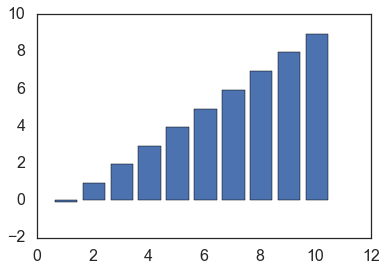

In [48]:
plt.bar(np.arange(1, 11) - 0.35, wb['layer1_LinearRegressionLayer']['linweights'])

Exactly what I was expecting! Yay!

I'm also curious to see what the weights and biases look like for `score_sine`.

In [ ]:
wb = open_wb('../experiments/wbs/')